In [1]:
%load_ext autoreload
%autoreload 2


## Import and gain knowledge of the data.

In [2]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
ds

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

In [3]:
# Convert to pandas DataFrame
import helpers.data_mining_helpers as dmh
import pandas as pd

df = pd.DataFrame(ds['train'])

# Format the text and labels
df['comment'] = dmh.format_rows_v2(df['comment'])

<class 'list'>


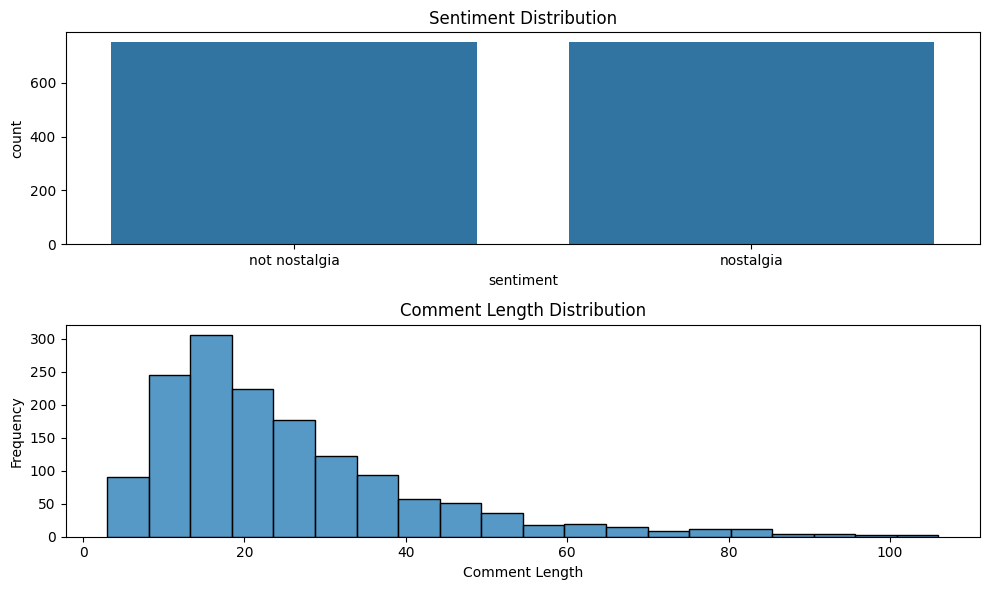

In [4]:
# Plot the graph of sentiment distribution and comment length distribution
import matplotlib.pyplot as plt
import seaborn as sns

print(type(df['comment'].iloc[0]))

df['comment'] = df['comment'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')

plt.subplot(2, 1, 2)
sns.histplot(df['comment_length'], bins=20)
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# Check the current df
df[:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   comment_length  
0              60  
1              26  
2              74  
3              68

In [6]:
print(df[df['sentiment'] == 'nostalgia'].iloc[::10][:5])

    sentiment                                            comment  \
1   nostalgia  The mist beautiful voice ever I listened to hi...   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...   
32  nostalgia  I remember my Mom listening to Jim over and ov...   
50  nostalgia  If I remember correctly, this song came out af...   
71  nostalgia  Gosh does this bring back memories. Nearly eve...   

    comment_length  
1               26  
18              41  
32              25  
50              39  
71              51  


In [7]:
# Check if there is duplicated data
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool
1


In [8]:
# Capture the duplicated row 
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

        sentiment                                            comment  \
78  not nostalgia  never heard this song before... WOW What an am...   

    comment_length  
78              13  


In [9]:
# Delete the duplicated data
print(df.iloc[78])

df = df.drop(index=78).reset_index(drop=True)

print(len(df))
print(df['comment'].duplicated().sum())
print(df.isnull().sum())


sentiment                                             not nostalgia
comment           never heard this song before... WOW What an am...
comment_length                                                   13
Name: 78, dtype: object
1499
0
sentiment         0
comment           0
comment_length    0
dtype: int64


In [10]:
# Check if there is null data
missing_values = df.isnull().sum()
print(missing_values)

sentiment         0
comment           0
comment_length    0
dtype: int64


In [11]:
# Set a df sample
X_sample = df.sample(n=500)
X_sample[0:4]

sentiment                                            comment  \
1286  not nostalgia  Stop complaining guys!! Go make music as good ...   
36        nostalgia  reminds me of my dad..... if only i had known ...   
31        nostalgia  My parents loved this too. Listening to the mu...   
1011      nostalgia  Romantic song in my mind so long time from 30 ...   

      comment_length  
1286              23  
36                16  
31                21  
1011              19

Shape of df: (1499, 3)
Shape of X_sample: (500, 3)
Sentiment distribution in X:
sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64
Sentiment distribution in X_sample:
sentiment
not nostalgia    254
nostalgia        246
Name: count, dtype: int64
All rows in X_sample are in X: True

Row in X_sample:
sentiment                                             not nostalgia
comment           Stop complaining guys!! Go make music as good ...
comment_length                                                   23
Name: 1286, dtype: object
Corresponding row in df:
sentiment                                             not nostalgia
comment           Stop complaining guys!! Go make music as good ...
comment_length                                                   23
Name: 1286, dtype: object


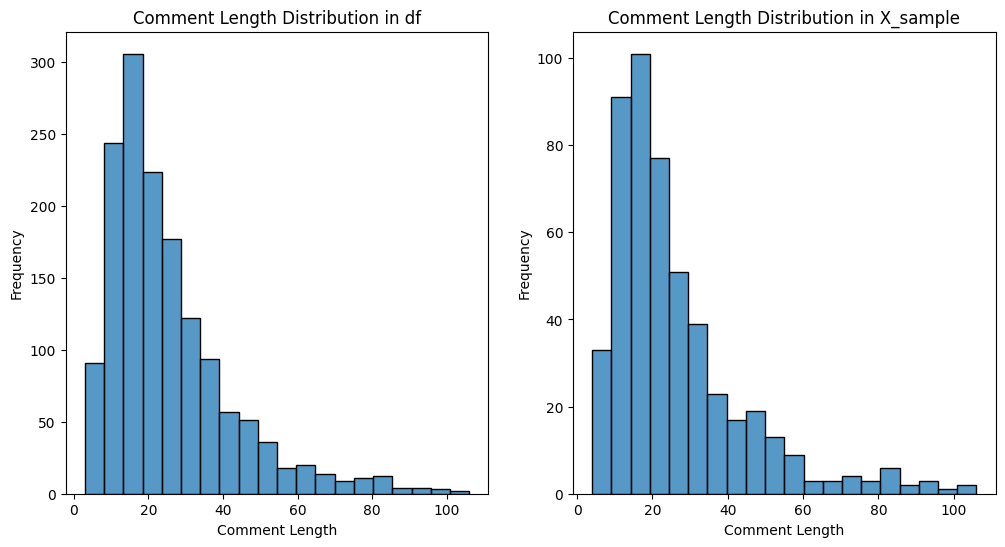

In [12]:
# Compare between df and X_sample
print("Shape of df:", df.shape)
print("Shape of X_sample:", X_sample.shape)

# Count the occurrences of each category in X and X_sample
sentiment_distribution_df = df['sentiment'].value_counts()
print("Sentiment distribution in X:")
print(sentiment_distribution_df)
sentiment_distribution_X_sample = X_sample['sentiment'].value_counts()
print("Sentiment distribution in X_sample:")
print(sentiment_distribution_X_sample)

# Check if all indices in X_sample exist in df
is_in_df = X_sample.index.isin(df.index).all()
print("All rows in X_sample are in X:", is_in_df)

# Pick a random index from X_sample and compare the corresponding rows
random_index = X_sample.index[0]  # Choosing the first index for demonstration
print("\nRow in X_sample:")
print(X_sample.loc[random_index])
print("Corresponding row in df:")
print(df.loc[random_index])

# Plot histograms of text lengths in df and X_sample
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['comment_length'], bins=20)
plt.title('Comment Length Distribution in df')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(X_sample['comment_length'], bins=20)
plt.title('Comment Length Distribution in X_sample')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# The shape of comment length distribution of df and X_sample is nearly the same.

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

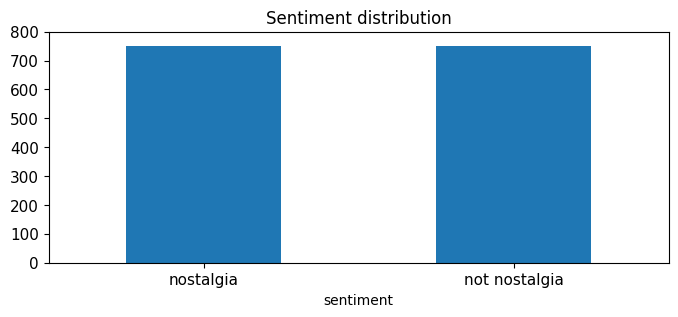

In [13]:
# Check the sentiment distribution of df
import matplotlib.pyplot as plt
%matplotlib inline

print(df.sentiment.value_counts())
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    254
nostalgia        246
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

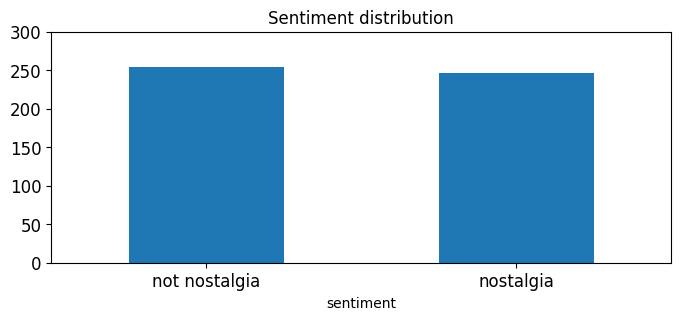

In [14]:
# Check the sentiment distribution of X_sample
print(X_sample.sentiment.value_counts())
# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# Two dataframes have slightly different sentiment counts distribution

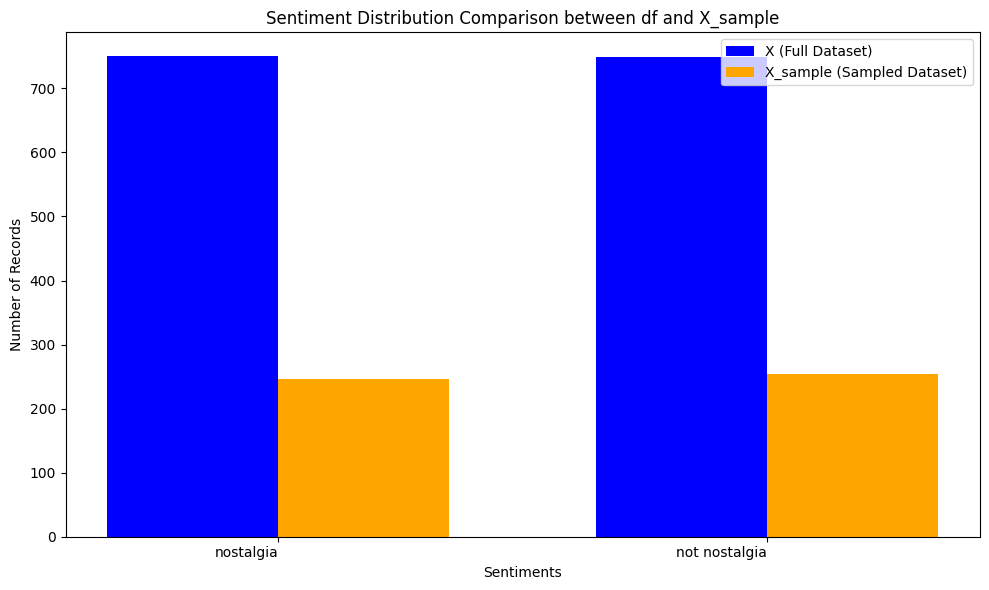

In [15]:
# Compare between each other
import numpy as np

# Count the number of occurrences of each category in df and X_sample
sentiment_df = df['sentiment'].value_counts().sort_index()
sentiment_X_sample = X_sample['sentiment'].value_counts().sort_index()

# Create side-by-side bar plots for the two datasets
categories = sentiment_df.index  # Category names
x = np.arange(len(categories))  # the label locations

width = 0.35
plt.figure(figsize=(10, 6))

# Bar plot for the full dataset (X and X_sample)
plt.bar(x - width/2, sentiment_df, width, label='X (Full Dataset)', color='blue')
plt.bar(x + width/2, sentiment_X_sample, width, label='X_sample (Sampled Dataset)', color='orange')

# Add labels, title, and custom ticks
plt.xlabel('Sentiments')
plt.ylabel('Number of Records')
plt.title('Sentiment Distribution Comparison between df and X_sample')
plt.xticks(x, categories, rotation=0, ha="right")
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Feature Creation

In [16]:
# Slicing sentences into words
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing and tokenization
df['cleaned_comment'] = df['comment'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True))
df[0:4]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t1070\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\t1070\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   comment_length                                    cleaned_comment  
0              60  [He, was, a, singer, with, a, golden, voice, t...  
1              26  [The, mist, beautiful, voice, ever, I, listene...  
2              74  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3              68  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [17]:
list(df[0:1]['cleaned_comment'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

## Feature subset selection

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Word frequency features
count_vectorizer = CountVectorizer()
X_freq = count_vectorizer.fit_transform(df['comment'])
print(X_freq[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [19]:
count_vectorizer.get_feature_names_out()[3284]

'the'

In [20]:
count_vectorizer.get_feature_names_out()[:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [21]:
X_freq.shape

(1499, 3730)

In [22]:
X_freq[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [23]:
plot_x = ["term_"+str(i) for i in count_vectorizer.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = X_freq[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

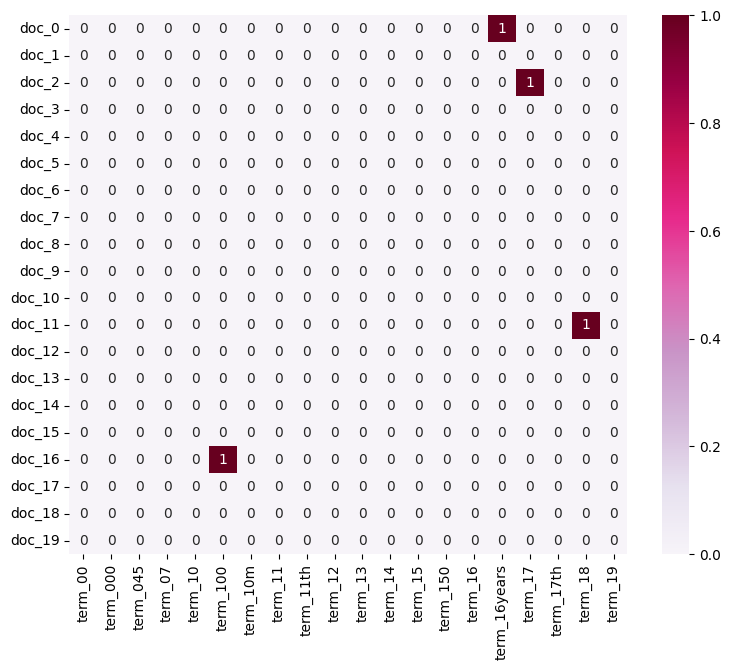

In [24]:
# Check the word frequency heatmap of the first twenty data
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

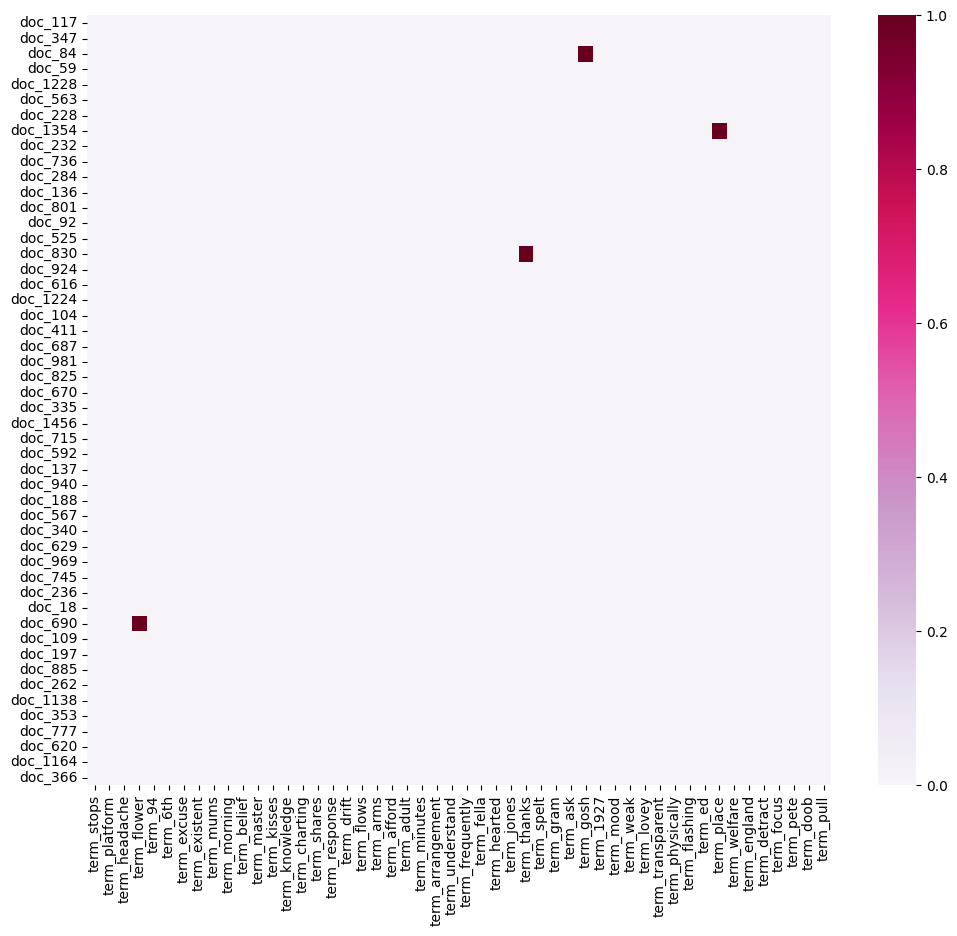

In [25]:
# Deelop a random word frequency heatmap
import random

num_docs = 50  
num_terms = 50  

# Randomly sample document indices and term indices
doc_indices = random.sample(range(X_freq.shape[0]), num_docs)
term_indices = random.sample(range(X_freq.shape[1]), num_terms)

# Subset the term-document matrix
plot_z_sample = X_freq[doc_indices][:, term_indices].toarray()

# Get the corresponding terms and documents for the labels
plot_x_sample = ["term_"+str(i) for i in count_vectorizer.get_feature_names_out()[term_indices]]
plot_y_sample = ["doc_"+ str(i) for i in doc_indices]

# Visualize the heatmap
df_sample = pd.DataFrame(plot_z_sample, columns=plot_x_sample, index=plot_y_sample)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_sample, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.show()

## Attribute Aggregation

In [26]:
# Find out the top 300 term frequencies
term_frequencies = []
for j in range(0,X_freq.shape[1]):
    term_frequencies.append(sum(X_freq[:,j].toarray()))

In [27]:
term_frequencies = np.asarray(X_freq.sum(axis=0))[0]

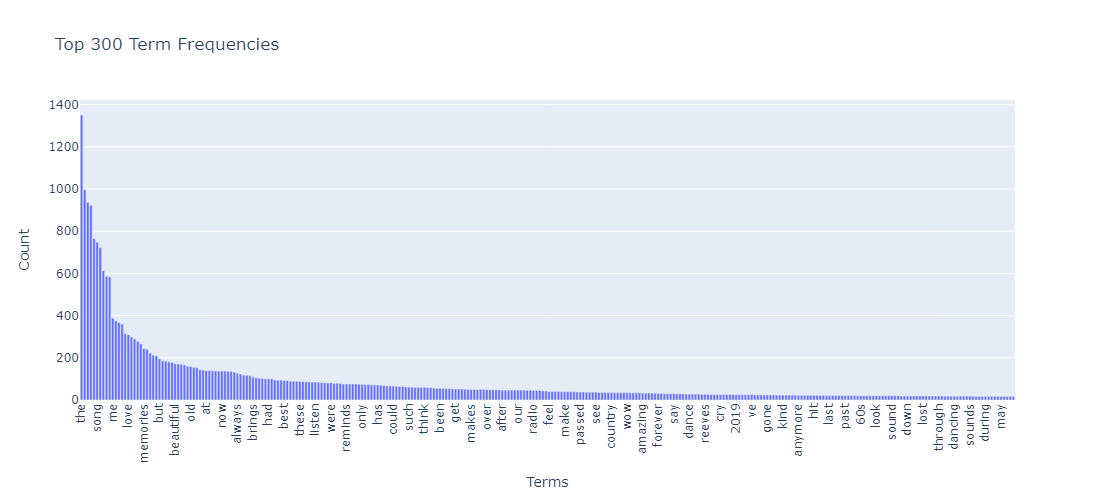

In [28]:
import plotly.express as px

term_freq_df = pd.DataFrame({
    'Term': count_vectorizer.get_feature_names_out(),  # All terms from the vocabulary
    'Frequency': term_frequencies
})

# Select the top 300 terms for visualization
top_n = 300
term_freq_df_top = term_freq_df.nlargest(top_n, 'Frequency')

# Create an interactive bar plot
fig = px.bar(term_freq_df_top, x='Term', y='Frequency', 
             title=f'Top {top_n} Term Frequencies',
             labels={'Term':'Terms', 'Frequency':'Count'},
             height=500, width=1200)

# Rotate x-axis
fig.update_layout(xaxis_tickangle=-90)
fig.show()

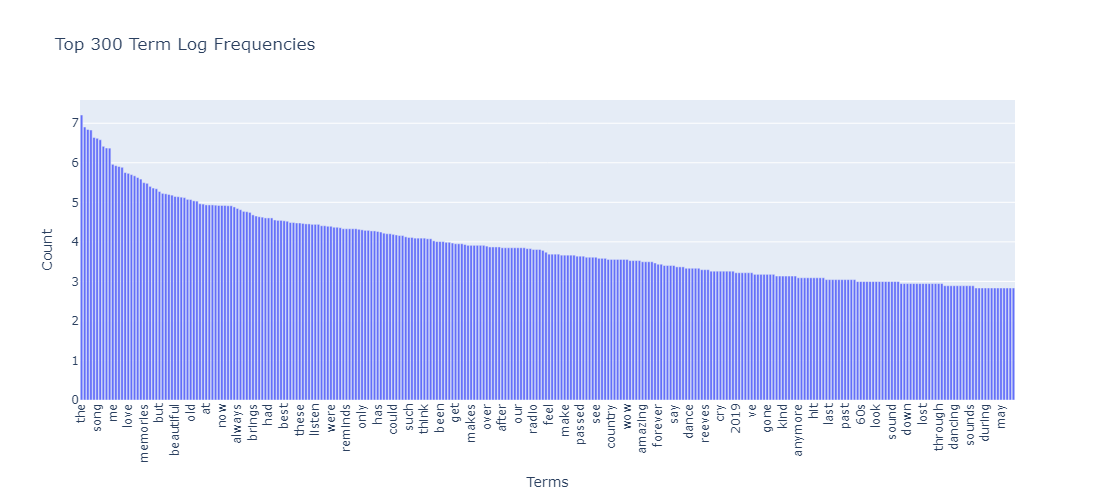

In [29]:
# Applying log feature for top 300 term frequencies
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

term_freq_df = pd.DataFrame({
    'Term': count_vectorizer.get_feature_names_out(),  # All terms from the vocabulary
    'Frequency': term_frequencies_log
})

# Select the top 300 terms for visualization
top_n = 300
term_freq_df_top = term_freq_df.nlargest(top_n, 'Frequency')

# Create an interactive bar plot
fig = px.bar(term_freq_df_top, x='Term', y='Frequency', 
             title=f'Top {top_n} Term Log Frequencies',
             labels={'Term':'Terms', 'Frequency':'Count'},
             height=500, width=1200)

# Rotate x-axis
fig.update_layout(xaxis_tickangle=-90)
fig.show()

## Find frequent pattern

In [30]:
# Create term documents of each row of each sentiment in df
sentiment = df['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for sent in sentiment:
    # Filter the original DataFrame by category
    sentiment_dfs[sent] = df[df['sentiment'] == sent].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_freq = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_freq.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sent in sentiment:
    filt_term_document_dfs[sent] = create_term_document_df(sentiment_dfs[sent])

In [31]:
# ///////////sentiment_num = 0/////////////
sentiment_num_0 = 0 
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_num_0]}:")
filt_term_document_dfs[sentiment[sentiment_num_0]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

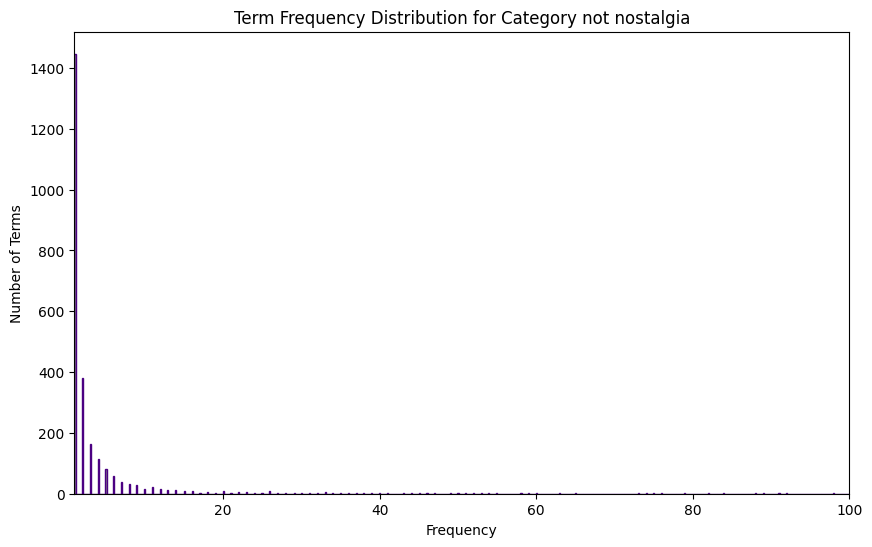

In [32]:
# Sum over to get total frequency for each word
word_counts = filt_term_document_dfs[sentiment[sentiment_num_0]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='gray', edgecolor='indigo')
plt.title(f'Term Frequency Distribution for Category {sentiment[sentiment_num_0]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

In [33]:
# Capture the top 5% terms of not nostalgia
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_num_0]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiment[sentiment_num_0]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'never', 'now', 'about', 'much', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'an', 'singer', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'video', 'heard', 'man', 'some', 'listening', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

In [34]:
# Capture the bottom 1% terms of not nostalgia
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_num_0]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiment[sentiment_num_0]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['12', '16years', 'zealand', 'sensitive', 'sense', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn', '1998', 'measure', 'spine', 'spewing', '2040', '2018', '2017', '2010', '1957', '1955', '1952', '1930s', '1930', '17th']


In [35]:
# ///////////////sentiment_num = 1///////////////////////////
sentiment_num = 1
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_num]}:")
filt_term_document_dfs[sentiment[sentiment_num]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

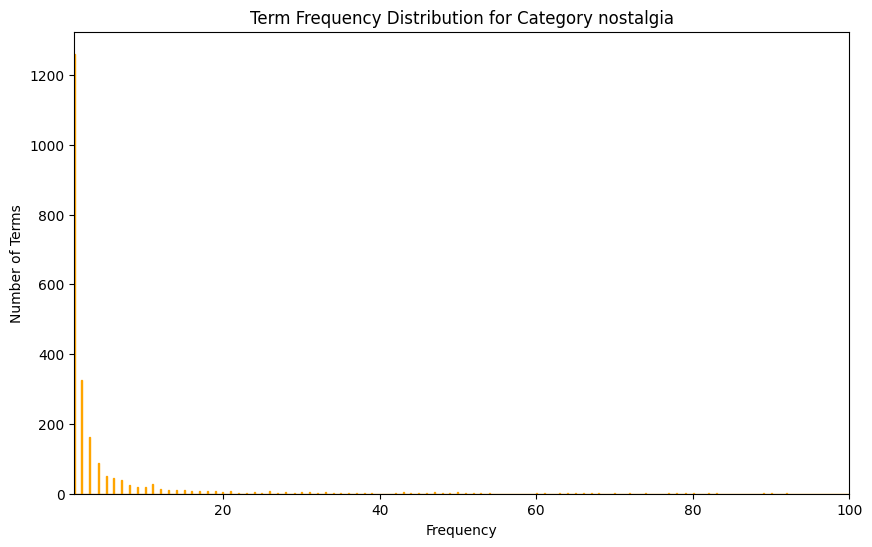

In [36]:
 # Sum over to get total frequency for each word
word_counts = filt_term_document_dfs[sentiment[sentiment_num]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='gray', edgecolor='orange')
plt.title(f'Term Frequency Distribution for Category {sentiment[sentiment_num]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

In [37]:
# Capture the top 5% terms of nostalgia
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]


sentiment_num = 1
# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_num]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiment[sentiment_num]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'just', 'he', 'always', 'have', 'she', 'first', 'dad', 'had', 'many', 'much', 'listening', 'his', 'up', 'like', 'loved', 'used', 'school', 'were', 'am', 'those', 'one', 'very', 'voice', 'be', 'him', 'every', 'times', 'never', 'these', 'heard', 'can', 'listen', 'not', 'young', 'what', 'played', 'best', 'they', 'are', 'hear', 'out', 'sing', 'thank', 'life', 'how', 'happy', 'then', 'thanks', 'radio', 'again', 'ago', 'really', 'mum', 'play', 'day', 'an', 'who', 'mom', 'some', 'our', 'there', 'singing', 'wonderful', 'after', 'makes', 'came', 'passed', 'will', 'little']


In [38]:
# Capture the bottom 1% terms of nostalgia
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_num]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiment[sentiment_num]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yo', 'yet', 'yester', 'yeas', 'yearn', 'yeah', '1952', '1950', '1969', '1964', 'lp', 'safety', 'safer', 'saddest', 'seeing', 'lou', 'proud', 'protest', '2002', 'yup', '1927', '11th']


In [39]:
# Show the filtered words in each sentiment

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

print(f'\nFor sentiment {sentiment[0]} we filter the following words:')
term_document_dfs[sentiment[0]] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment[0]])
print(f'\nFor sentiment {sentiment[1]} we filter the following words:')
term_document_dfs[sentiment[1]] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment[1]])




For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1

Similarities: year numbers, prepositions, articles, conjunctions

In [40]:
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_num_0]}:")
term_document_dfs[sentiment[sentiment_num_0]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  14  15  150  ...  young  younger  \
0     0    0    0   0    0    0   0   0   0    0  ...      0        0   
1     0    0    0   0    0    0   0   0   0    0  ...      0        0   
2     0    0    0   0    0    0   0   0   0    0  ...      0        0   
3     0    0    0   0    0    0   0   0   0    0  ...      0        0   
4     0    0    0   0    0    0   0   0   0    0  ...      0        0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...    ...      ...   
744   0    0    0   0    0    0   0   0   0    0  ...      0        0   
745   0    0    0   0    0    0   0   0   0    0  ...      0        0   
746   0    0    0   0    0    0   0   0   0    0  ...      0        0   
747   0    0    0   0    0    0   0   0   0    0  ...      0        0   
748   0    0    0   0    0    0   0   0   0    0  ...      0        0   

     youngest  youngsters  yourself  youth  youtube  yrs  yuo  zulus  
0           0           0         0      0        0    0    0      0  
1           0           0         0      0        0    0    0      0  
2           0           0         0      0        0    0    0      0  
3           0           0         0      0        0    0    0      0  
4           0           0         0      0        0    0    0      0  
..        ...         ...       ...    ...      ...  ...  ...    ...  
744         0           0         0      0        0    0    0      0  
745         0           0         0      0        0    0    0      0  
746         0           0         0      0        0    0    0      0  
747         0           0         0      0        0    0    0      0  
748         0           0         0      0        0    0    0      0  

[749 rows x 2446 columns]

In [41]:
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_num]}:")
term_document_dfs[sentiment[sentiment_num]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  12  13  14  15  16  17  18  ...  yesterday  yokel  younger  \
0     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
1     0   0   0   0   0   0   0   0   1   0  ...          0      0        0   
2     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
3     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
4     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...        ...    ...      ...   
745   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
746   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
747   0   0   0   0   1   0   0   0   0   0  ...          0      0        0   
748   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
749   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

In [42]:
# Export the term docs of each sentiment

from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    sentiment_safe = sentiment.replace('.', '_')

    obj = DF2DB(term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


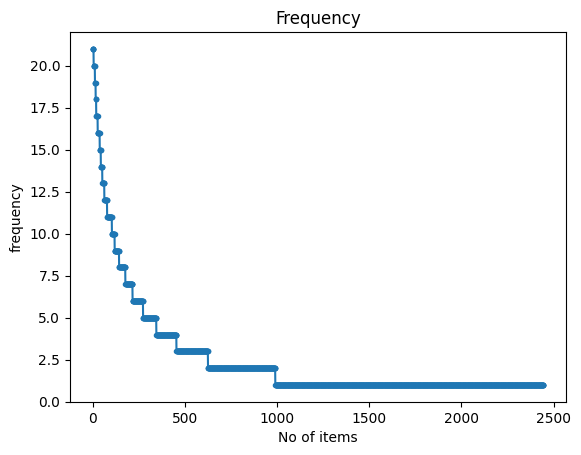

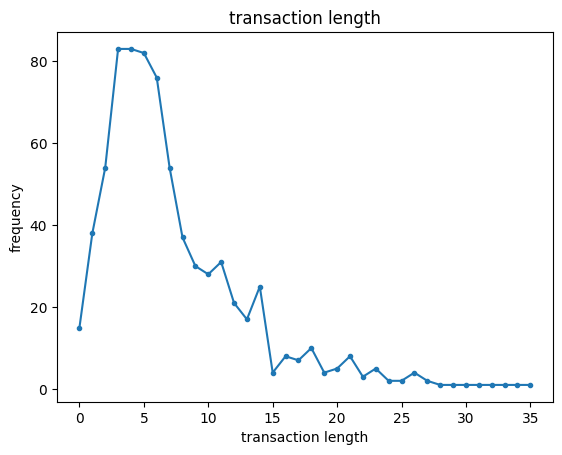

In [43]:
# Show the info of the not nostalgia data
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


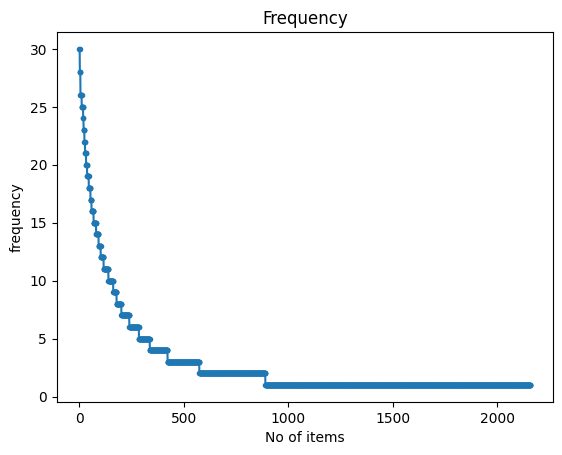

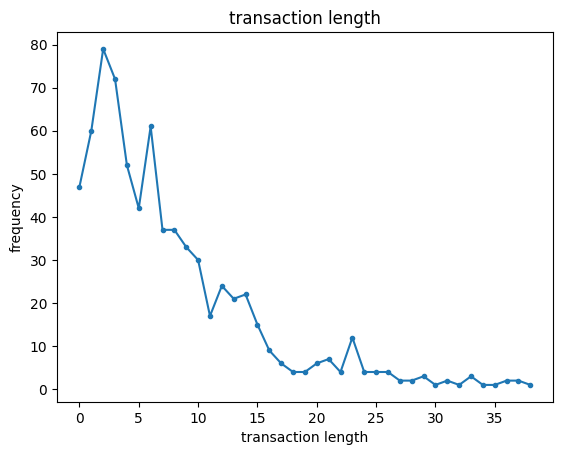

In [44]:
# Show the info of the nostalgia data
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

There is a sharp drop in how frequently items appear in both sentiments, which means the data has many items that are not used much.
Both having high sparsity show that the item combinations rarely occured.
The transaction length graphs show that there are only short item combinations, and the skewness of the distribution may indicate that using FPGrowth is a fit method.

In [45]:
# Implement FPGrowth to not nostalgia
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_not_nostalgia= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.004792928695678711


In [46]:
obj.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [47]:
# Implement FPGrowth to nostalgia
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.004792928695678711


In [48]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177        go       28
178     takes       30
179  favorite       30

[180 rows x 2 columns]

In [49]:
# Group together all of the dataframes related to find patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for data in dfs:
    for pattern in data['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(data) for data in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for data in dfs:
    filtered_df = data[data['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
219     takes       30
217      ever       28
218     would       28
216      wish       26
215        or       26
..        ...      ...
95   together        9
96      along        9
97         tv        9
101     karen        9
100     place        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [59]:
# To augment a big map of the df
X_tdm = count_vectorizer.fit_transform(df['comment'])  
terms = count_vectorizer.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  player  its  until  \
0      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
2      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
3      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
4      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...    ...   
1494   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1495   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   

      records  left  together  along  tv  karen  place  
0           0     0         0      0   0      0      0  
1           0     0         0      0   0      0      0  
2           0     0         0      0   0      0      0  
3           0     0         0      0   0      0      0  
4           0     0         0      0   0      0      0  
...       ...   ...       ...    ...  ..    ...    ...  
1494        0     0         0      0   0      0      0  
1495        0     0         0      0   0      0      0  
1496        0     0         0      0   0      0      0  
1497        0     0         0      0   0      0      0  
1498        0     0         0      0   0      0      0  

[1499 rows x 3950 columns]

## Dimentionality Reduciton

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [52]:
X_pca_tdm.shape

(1499, 2)

In [53]:
X_tsne_tdm.shape

(1499, 2)

In [54]:
X_umap_tdm.shape

(1499, 2)

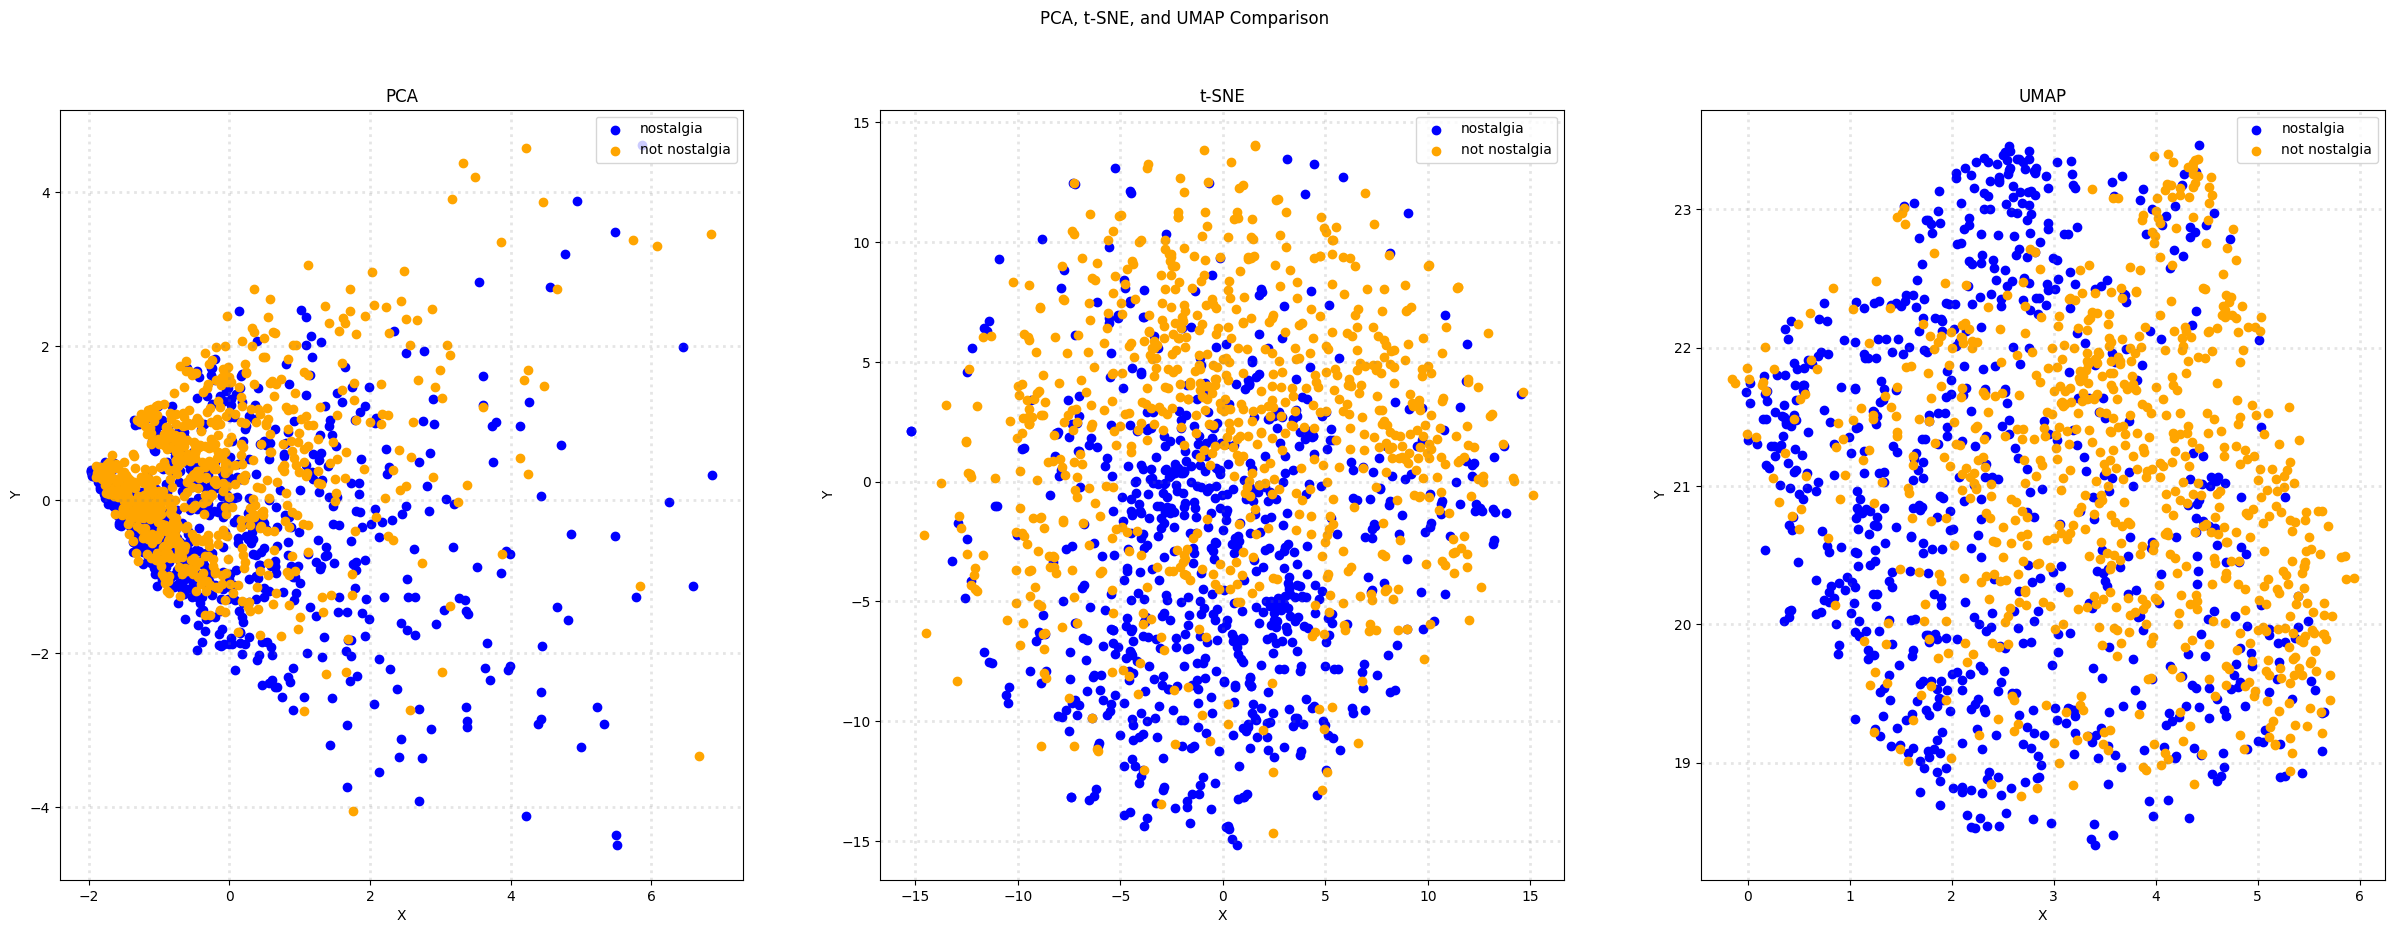

In [61]:
# Try to see the distribution of the dimension reduced data of tdm_df in 2D

col = ['blue', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [62]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

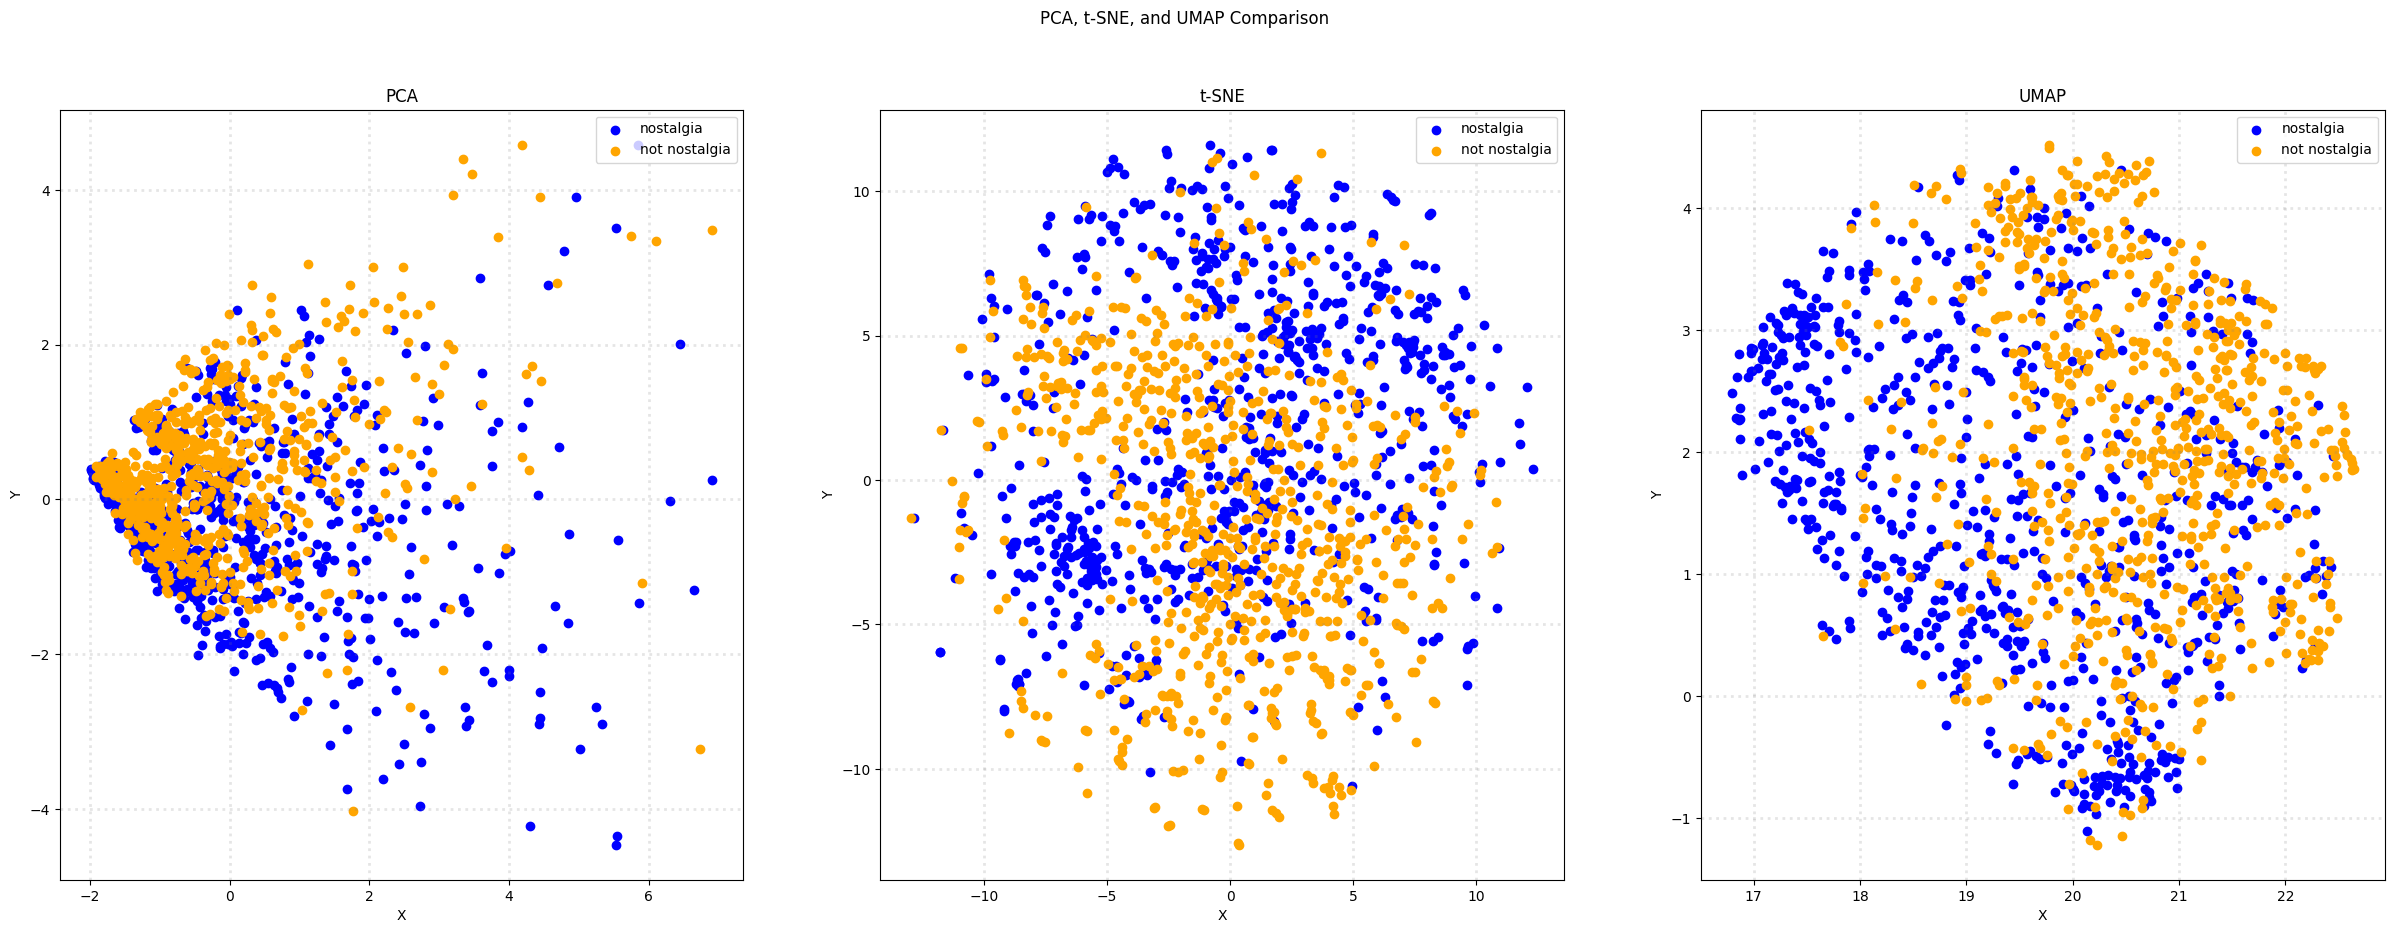

In [63]:
# Try to see the distribution of the dimension reduced data of augmented_df in 2D
col = ['blue', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

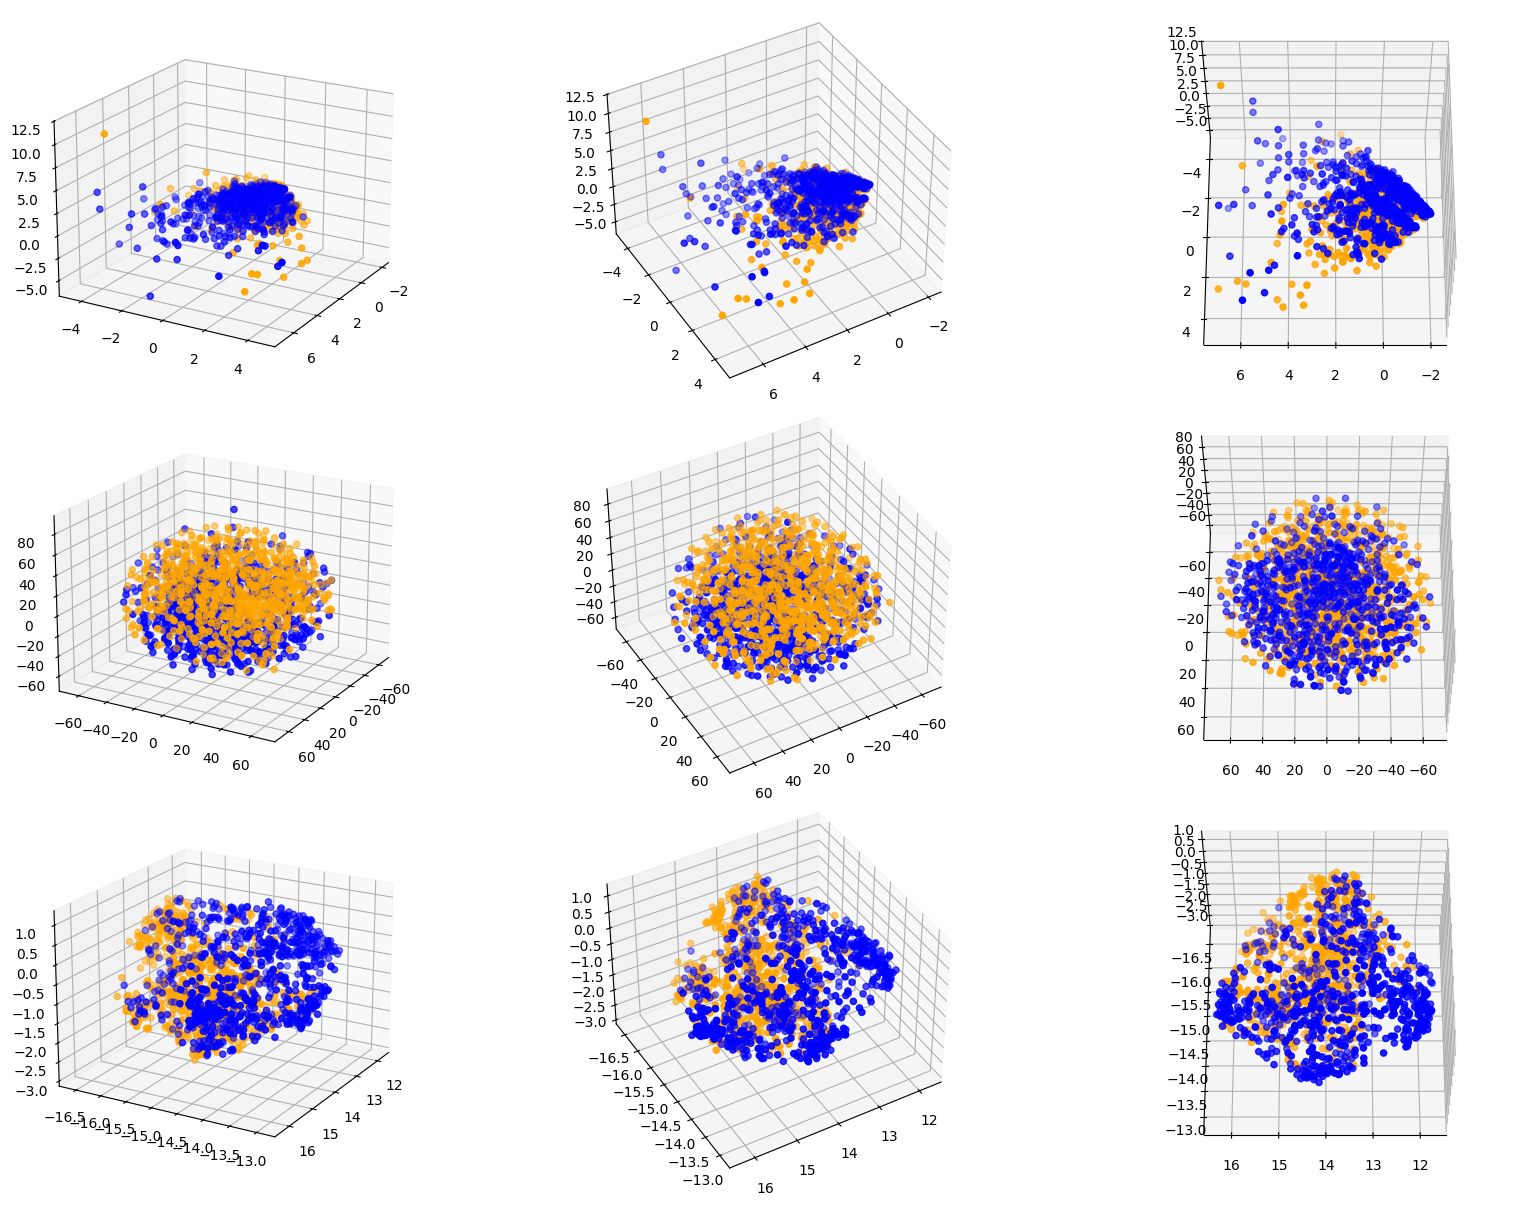

In [64]:
# Try to see the distribution of the dimension reduced data of augmented_df in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming augmented_df is already loaded
# Perform dimensionality reduction with PCA, t-SNE, and UMAP
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)


def plot_3d(X_reduced, title, ax):
    for c, category in zip(col, categories):
        indices = df['sentiment'] == category
        xs = X_reduced[indices][:, 0]
        ys = X_reduced[indices][:, 1]
        zs = X_reduced[indices][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

# Create subplots for each method with different angles
fig = plt.figure(figsize=(18, 12))

# PCA Plot
ax1 = fig.add_subplot(331, projection='3d')
plot_3d(X_pca_3d, 'PCA - Angle 1', ax1)
ax1.view_init(elev=20, azim=30)

ax2 = fig.add_subplot(332, projection='3d')
plot_3d(X_pca_3d, 'PCA - Angle 2', ax2)
ax2.view_init(elev=40, azim=60)

ax3 = fig.add_subplot(333, projection='3d')
plot_3d(X_pca_3d, 'PCA - Angle 3', ax3)
ax3.view_init(elev=60, azim=90)

# t-SNE Plot
ax4 = fig.add_subplot(334, projection='3d')
plot_3d(X_tsne_3d, 't-SNE - Angle 1', ax4)
ax4.view_init(elev=20, azim=30)

ax5 = fig.add_subplot(335, projection='3d')
plot_3d(X_tsne_3d, 't-SNE - Angle 2', ax5)
ax5.view_init(elev=40, azim=60)

ax6 = fig.add_subplot(336, projection='3d')
plot_3d(X_tsne_3d, 't-SNE - Angle 3', ax6)
ax6.view_init(elev=60, azim=90)

# UMAP Plot
ax7 = fig.add_subplot(337, projection='3d')
plot_3d(X_umap_3d, 'UMAP - Angle 1', ax7)
ax7.view_init(elev=20, azim=30)

ax8 = fig.add_subplot(338, projection='3d')
plot_3d(X_umap_3d, 'UMAP - Angle 2', ax8)
ax8.view_init(elev=40, azim=60)

ax9 = fig.add_subplot(339, projection='3d')
plot_3d(X_umap_3d, 'UMAP - Angle 3', ax9)
ax9.view_init(elev=60, azim=90)

plt.tight_layout()
plt.show()


## Binarization

In [65]:
# Binarize sentiment

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()
df[:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   comment_length                                    cleaned_comment  \
0              60  [He, was, a, singer, with, a, golden, voice, t...   
1              26  [The, mist, beautiful, voice, ever, I, listene...   
2              74  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3              68  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4              13  [listening, to, his, songs, reminds, me, of, m...   
5              39  [Every, time, I, heard, this, song, as, a, chi...   
6              27  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7              34  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8               8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment  
0  {emotional, have, Lord, to, that, days, Reeves...           [1]  
1  {listened, Never, forgotten, to, beautiful, an...           [0]  
2  {little, have, smooth, simple, grew, to, Reeve...           [0]  
3  {life, have, to, some, that, Nam, God, later, ...           [1]  
4  {who, him, my, me, mum, to, of, songs, played,...           [0]  
5  {used, heard, to, Every, that, song., got, voi...           [0]  
6  {then,, to, how, things., when, dad, in, for, ...           [0]  
7  {to, 71, puts, he, Reeves, childhood, nostalgi...           [0]  
8        {always, are, you, in, heart, my, Wherever}           [1]

## TFIDF

In [77]:
# Add a column str for TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

df_tfidf = df
# Prepare text for vectorization
df_tfidf['cleaned_comment_str'] = df_tfidf['cleaned_comment'].apply(lambda x: ' '.join(x))

df_tfidf[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   comment_length                                    cleaned_comment  \
0              60  [He, was, a, singer, with, a, golden, voice, t...   
1              26  [The, mist, beautiful, voice, ever, I, listene...   
2              74  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3              68  [30, day, leave, from, 1st, tour, in, Viet, Na...   

                                      tokenized_text bin_sentiment  \
0  {emotional, have, Lord, to, that, days, Reeves...           [1]   
1  {listened, Never, forgotten, to, beautiful, an...           [0]   
2  {little, have, smooth, simple, grew, to, Reeve...           [0]   
3  {life, have, to, some, that, Nam, God, later, ...           [1]   

                                 cleaned_comment_str  
0  He was a singer with a golden voice that I lov...  
1  The mist beautiful voice ever I listened to hi...  
2  I have most of Mr. Reeves songs . Always love ...  
3  30 day leave from 1st tour in Viet Nam to conv...

In [78]:
# Generate TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_tfidf['cleaned_comment_str'])

# Target variable
y_tfidf = df_tfidf['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

# Naive Bayes Classifier with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predictions
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, y_pred_tfidf))


              precision    recall  f1-score   support

           0       0.86      0.79      0.82       142
           1       0.82      0.89      0.85       158

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



## Naive Bayes 

In [80]:
# Create a mapping from numerical labels to sentiment
sent_mapping = df['sentiment'].drop_duplicates().values
#target_names = [sent_mapping]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [81]:
# Naive Bayes Classifier with Word Frequency
nb_freq = MultinomialNB()
nb_freq.fit(X_train, y_train)

# Predictions
y_pred = nb_freq.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sent_mapping, digits=4))


Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



c:\users\t1070\appdata\local\programs\python\python39\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




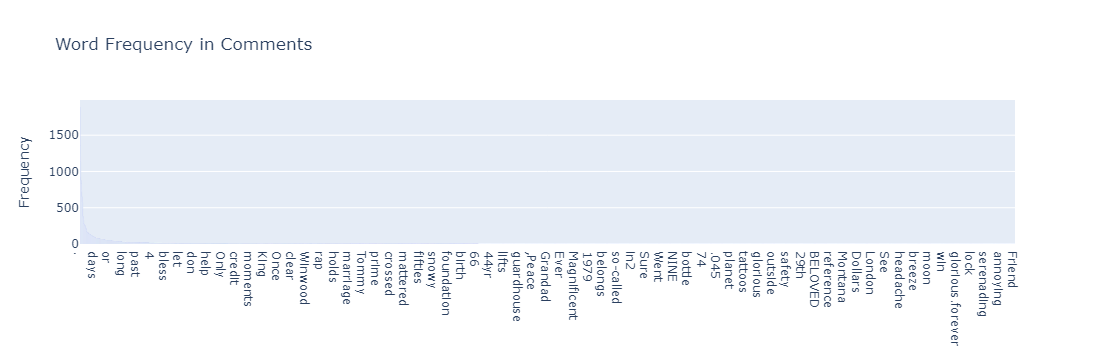

In [82]:
import helpers.text_analysis as ta

# Get token frequency
tokens, token_counts = ta.get_tokens_and_frequency(df['cleaned_comment'])

# Plot word frequency
ta.plot_word_frequency((tokens, token_counts), "Word Frequency in Comments")


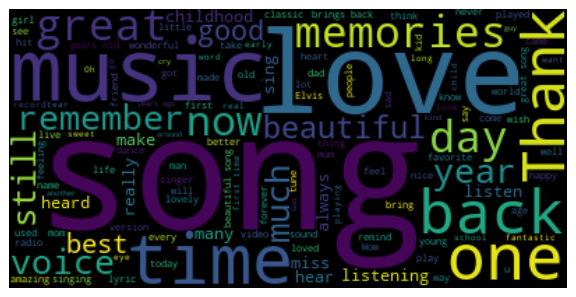

In [85]:
text = ' '.join(df['comment'])
ta.plot_word_cloud(text)

## For the inefficient part,
1. Using too much time and many blocks on learning the data structure, manipulation, since this is not a complex dataset after all.
2. Sampling but did not use the sample to run the analysis.
3. Throwing all bunch of text to generate unigrams, but many words are useless.
## For improving preprocessing for specific datasets,
1. Highlight the specific notations or numbers such as "@gmail.com", "000", to reduce the noise of the data.
2. Slice the text into different partitions, such as id, main part, cc, signature, to reduce noise of the data.
3. Try to pick up representitive words in the filtered df to improve accuracy.